# <u><center>Naive Bayes Algorithm</center></u>


Naive Bayes models is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

In [6]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

### Preparing Data


In [7]:
#Read SMSSpamCollection dataset
docs = pd.read_csv("SMSSpamCollection.csv")


In [8]:
#print first 5 records
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# counting spam and ham instances
ham_spam= docs.Class.value_counts()

#print ham_spam
print(ham_spam)

ham     4825
spam     747
Name: Class, dtype: int64


In [10]:
docs.shape

(5572, 2)

In [11]:
#print percentage of spam messages in your dataset

print("Spam % is",(ham_spam[1]/(ham_spam[0]+ham_spam[1])*100))

Spam % is 13.406317300789663


In [12]:
# mapping a column labels to ham as 0 and spam as 1
docs['label'] =docs['Class'].map({'ham':0,'spam':1})

#print last 5 records of dataset
docs.tail()

,Class,sms,label
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [13]:
#Fetch all features 
X= docs.sms

#Fetch label
y=docs.label


#print shape of X and y
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split
# splitting into test and train with random state as 1 and test size as 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [15]:
# print X_train first 5 records

X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object


```Countvectorizer()``` will convert the documents into a set of unique words alphabetically sorted and indexed.

In [16]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Instantiate CountVectorizer with stop_words
vect = CountVectorizer(stop_words='english')


# fit vect on your feature text (X_train)
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [17]:
#check count of words in your features (Hint: Use vocabulary_ on CountVectorizer)
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [18]:
#Check how feature names separately in form of words( Hint: Use get_feature_names function on  CountVectorizer)
vect.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

Now let's transform our training features. 



In [19]:
# transform feature data
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [20]:
#Now let's see how our X_train data looks like after tranformation ( hint: convert it into array and then print )

print(X_train_transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
# printing length of feature names
print(len(vect.get_feature_names_out()))

7204


So our final dictionary is made of 7204 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features. 

In [23]:
# Print shape of X_train_transformed
X_train_transformed.shape

(4179, 7204)

In [24]:
#Print X_train_transformed
print(X_train_transformed)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


This representation can be understood as follows:

Consider first 4 rows of the output: (0,50), (0,264), (0,509) and (0,1527). It says that the first document (index 0) has 
50th , 264nd , 509th and 1552th 'word' present in the document, and that they appear only
once/twice in the document- indicated by the right hand column entry. 



In real problems, you often work with large documents and vocabularies, and each document contains only a few words in the vocabulary. So it would be a waste of space to store the vocabulary in a typical dataframe, since most entries would be zero. Also, matrix products, additions etc. are much faster with sparse matrices. That's why we use sparse matrices to store the data.




In [26]:
#Print feature names
vect.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

In [28]:
'''converting X_train_transformed matrix to dataframe
'''

pd.DataFrame(X_train_transformed.toarray(),columns=vect.get_feature_names_out())


,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.
A corpus of documents can thus be represented by a matrix with one row per document and one column per
token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the "Bag of Words" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

Let us summarise all we have done till now:

- ```vect.fit(train)``` learns the vocabulary of the training data
- ```vect.transform(train)``` uses the fitted vocabulary to build a document-term matrix from the training data
- ```vect.transform(test)``` uses the fitted vocabulary to build a document-term matrix from the testing data

## Bernoulli Naive Bayes algorithm

So now textual features are converted into feature vectors which are in numeric form. Now training data is ready to be fed into your algorithm

In [29]:
#import BernoulliNB

from sklearn.naive_bayes import BernoulliNB
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit model on training dataset
bnb.fit(X_train_transformed,y_train)
# predict class of y
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba = bnb.predict_proba(X_test_tranformed)

# print accuracy score 
print(metrics.accuracy_score(y_test,y_pred_class))

0.9770279971284996


In [30]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# get confusion metrics
confusion =metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)
#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1207    1]
 [  31  154]]


In [31]:
# Calculate sensitivity using confusion metrics
sensitivity = TP/float(TP+FN)

#Print sensitivity
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [32]:
# Calculate specificity using confusion metrics
specificity =TN/float(TN+FP)

#Print specificity
print("specificity",specificity)

specificity 0.9991721854304636


In [33]:
# Calculate precision using confusion metrics
precision = TP/float(TP+FP)

# print precision

print("precision",precision)

precision 0.9935483870967742


In [34]:
#import classification_report

from sklearn.metrics import classification_report
#Print Precision, recall, f1-score and support 

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



## Creating ROC curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1



In [35]:
# import roc_curve and and auc

from sklearn.metrics import roc_curve,auc
#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])


#Calculate area under curve
roc_auc = auc(false_positive_rate,true_positive_rate)

In [36]:
#Print area under the curve

print(roc_auc)

0.9967692858421334


The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

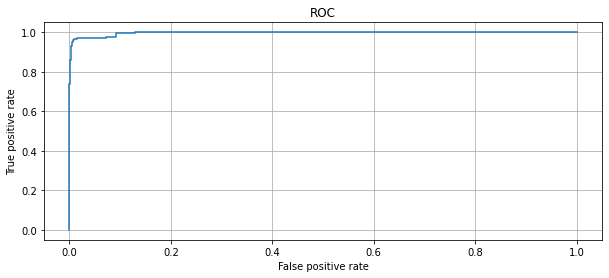

In [37]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )

plt.figure(figsize=(10,4))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()

## Multinomial Naive bayes

In [38]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# instantiate bernoulli NB object
mnb = MultinomialNB()

# fit model on training dataset
mnb.fit(X_train_transformed,y_train)
# predict class of y
y_pred_class = mnb.predict(X_test_tranformed)

# predict probability on y
y_pred_proba =mnb.predict_proba(X_test_tranformed)

# print accuracy score 

print(metrics.accuracy_score(y_test,y_pred_class))

0.9877961234745154


#### Evaluation metrics

In [39]:
# get confusion metrics
confusion = metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)
#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1201    7]
 [  10  175]]


Let us print precision, recall and f1 score  using metrics sklearn library classification report

In [40]:
#import classification_report
from sklearn.metrics import classification_report
#Print Precision, recall, f1-score and support 

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



#### ROC curve

In [41]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve,auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])


#Calculate area under curve
roc_auc=auc(false_positive_rate,true_positive_rate)

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

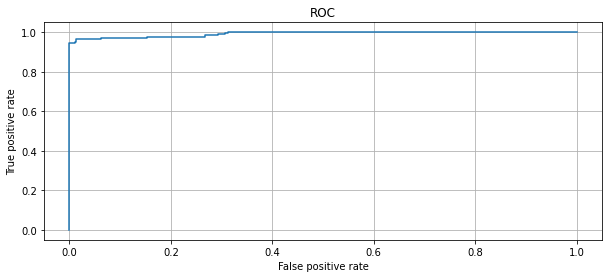

In [42]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )

plt.figure(figsize=(10,4))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()





## GuassianNB

In [43]:
# import GaussianNB

from sklearn.naive_bayes import GaussianNB
# instantiate bernoulli NB object
gnb = GaussianNB()

# fit model on training dataset

gnb.fit(X_train_transformed.toarray(),y_train)
# predict class of y
y_pred_class = gnb.predict(X_test_tranformed.toarray())

# predict probability on y
y_pred_proba =gnb.predict_proba(X_test_tranformed.toarray())

# print accuracy score 

print(metrics.accuracy_score(y_test,y_pred_class))

0.8901651112706389


In [44]:
# get confusion metrics
confusion = metrics.confusion_matrix(y_test,y_pred_class)

#print confusion metrics
print(confusion)

#Get True negative, Flase positive, Flase negative and True positive using confusion metrics
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

[[1066  142]
 [  11  174]]


In [45]:
#import classification_report
from sklearn.metrics import classification_report

#Print Precision, recall, f1-score and support 

print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1208
           1       0.55      0.94      0.69       185

    accuracy                           0.89      1393
   macro avg       0.77      0.91      0.81      1393
weighted avg       0.93      0.89      0.90      1393



####  ROC CURVE


In [46]:
# import roc_curve and and auc
from sklearn.metrics import roc_curve,auc

#Calculate false_positive_rate , true_positive_rate and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds =roc_curve(y_test,y_pred_proba[:,1])


#Calculate area under curve

roc_auc=auc(false_positive_rate,true_positive_rate)

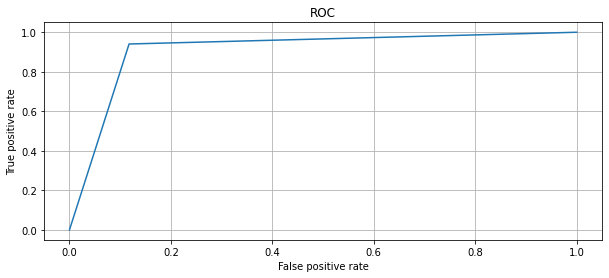

In [47]:
# plotting the ROC curve (false_positive_rate vs true_positive_rate )


plt.figure(figsize=(10,4))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)
plt.grid()
plt.show()



In [48]:
# print accuracy score of all three Naive Bayes algorithms.

print("Bernoulli",metrics.accuracy_score(y_test,bnb.predict(X_test_tranformed.toarray())))
print("Multinomial",metrics.accuracy_score(y_test,mnb.predict(X_test_tranformed.toarray())))
print("Guassian",metrics.accuracy_score(y_test,gnb.predict(X_test_tranformed.toarray())))



Bernoulli 0.9770279971284996
Multinomial 0.9877961234745154
Guassian 0.8901651112706389


And hence it's proved that Multinomial Naive Bayes would solve this usecase of classifying spam messages correctly. 

So here with this conclusion that Multinomial works better here because frequency of each feature word has occured more than once in many cases, and hence multinomial fits  better in this case compared to Bernoulli and guassian Naive Bayes